**Importing**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

**Load Data**


In [38]:
print(sns.get_dataset_names())

# Load a built in dataset based on US State car crash percentages
crash_df = sns.load_dataset('car_crashes')
crash_df.head()

['anagrams', 'anscombe', 'attention', 'brain_networks', 'car_crashes', 'diamonds', 'dots', 'dowjones', 'exercise', 'flights', 'fmri', 'geyser', 'glue', 'healthexp', 'iris', 'mpg', 'penguins', 'planets', 'seaice', 'taxis', 'tips', 'titanic']


,total,speeding,alcohol,not_distracted,no_previous,ins_premium,ins_losses,abbrev
0,18.8,7.332,5.640,18.048,15.040,784.55,145.08,AL
1,18.1,7.421,4.525,16.290,17.014,1053.48,133.93,AK
2,18.6,6.510,5.208,15.624,17.856,899.47,110.35,AZ
3,22.4,4.032,5.824,21.056,21.280,827.34,142.39,AR
4,12.0,4.200,3.360,10.920,10.680,878.41,165.63,CA


**1.Distribution Plot**

**Distribution Plot**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


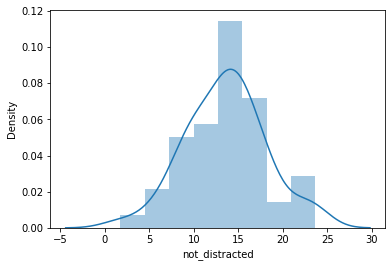

In [23]:
##univariate distribution (for one variable)
sns.distplot(crash_df['not_distracted'])  

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


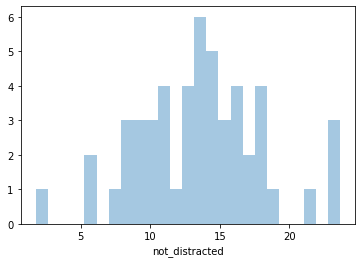

In [20]:


sns.distplot(crash_df['not_distracted'], kde=False, bins=25)


**Joint plot**

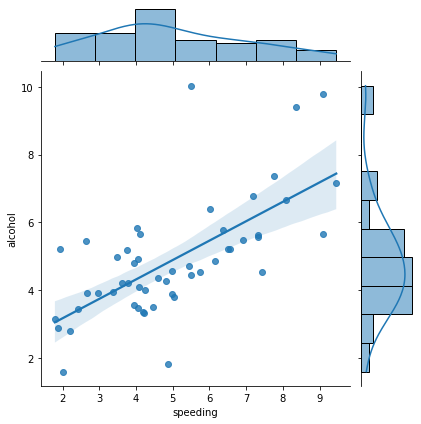

In [15]:
sns.jointplot(x='speeding', y='alcohol', data=crash_df, kind='reg')

#compares two distribution

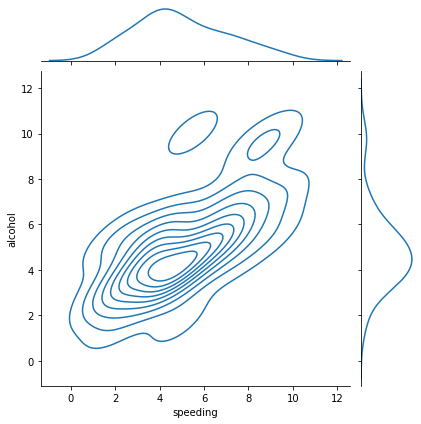

In [22]:
sns.jointplot(x='speeding', y='alcohol', data=crash_df, kind='kde')  #kernel density estimation

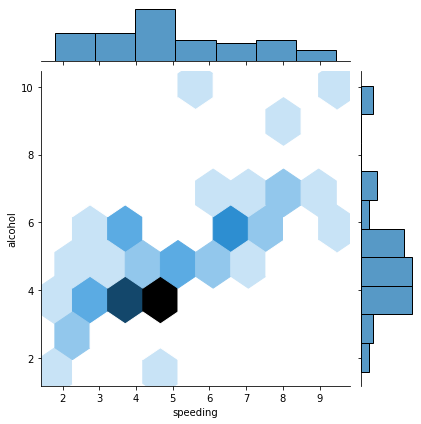

In [24]:
sns.jointplot(x='speeding', y='alcohol', data=crash_df, kind='hex')

**KDE Plot**

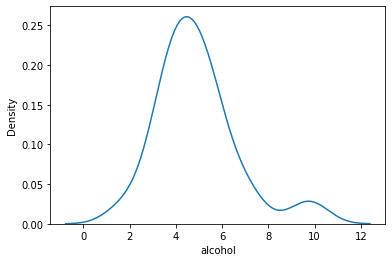

In [26]:
sns.kdeplot(crash_df['alcohol'])

**Pair Plot**

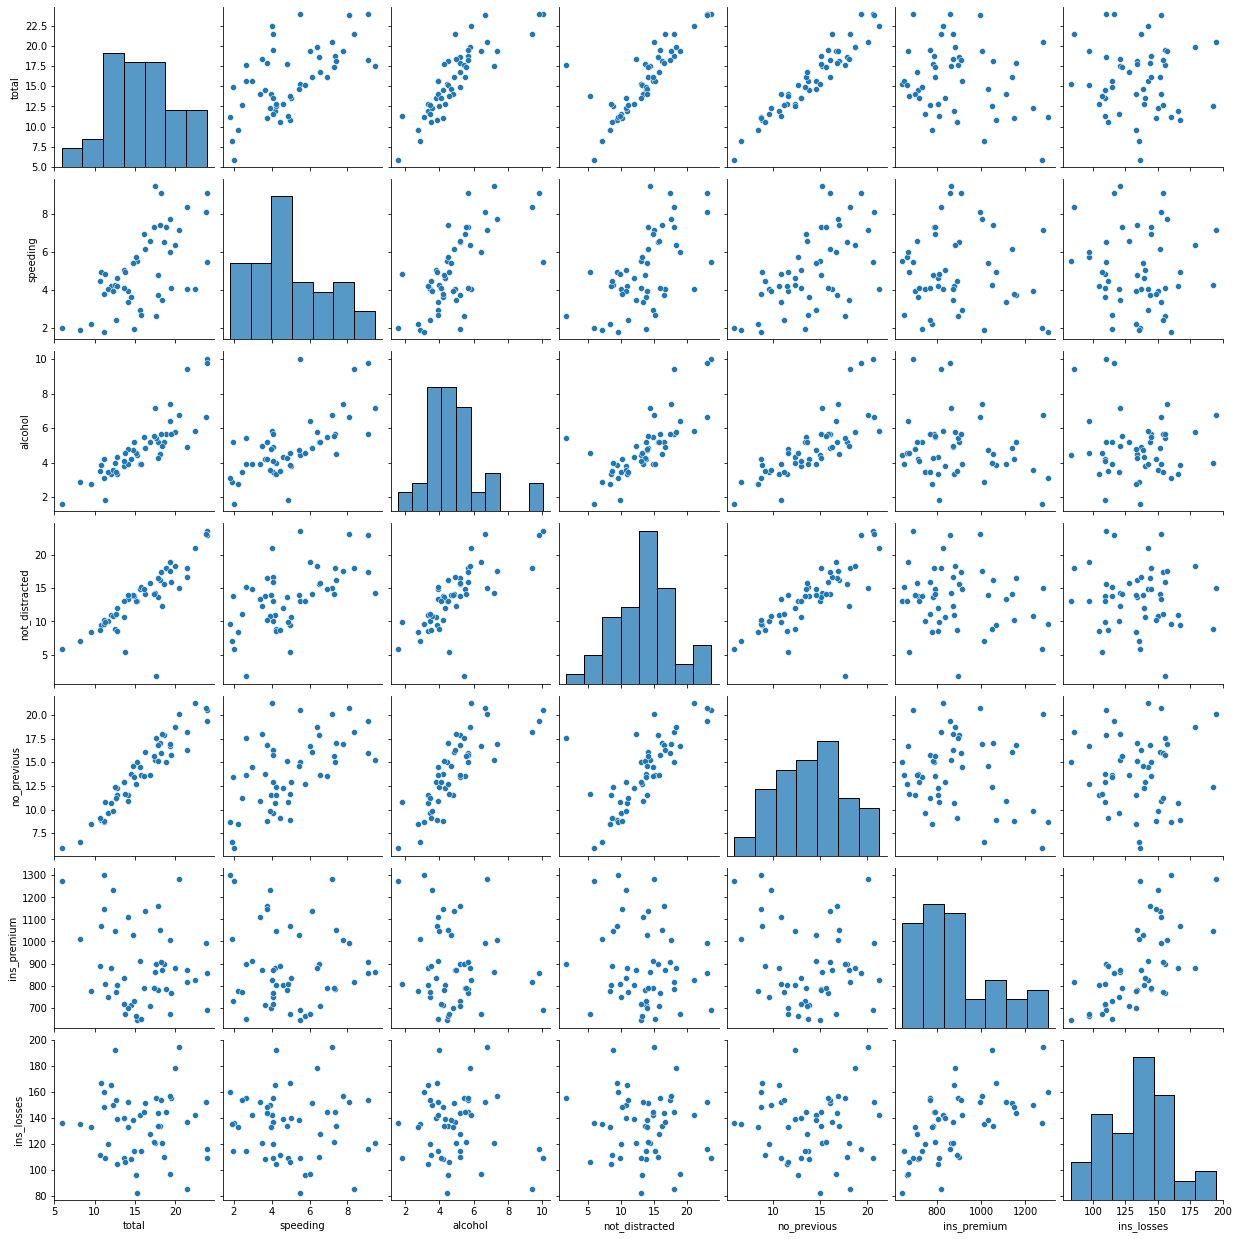

In [29]:
sns.pairplot(crash_df)

In [31]:
tips_df=sns.load_dataset('tips')
tips_df

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


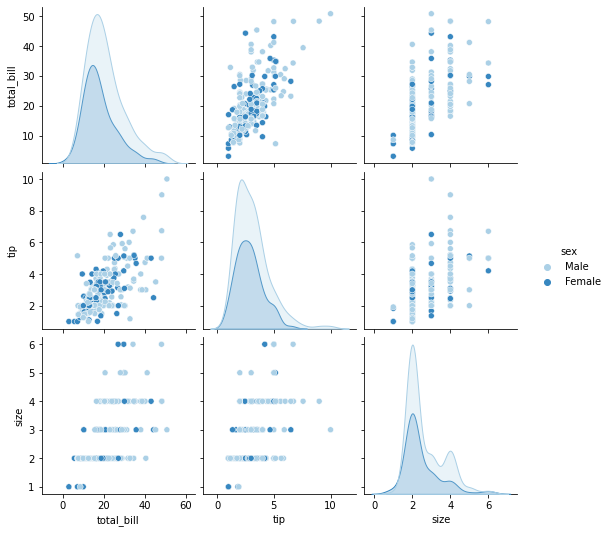

In [34]:
sns.pairplot(tips_df,hue='sex',palette='Blues')

**Rug Plot**

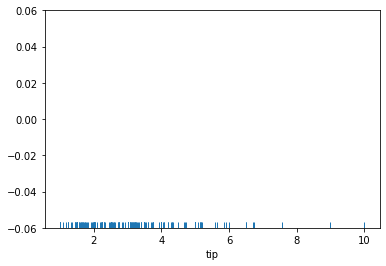

In [35]:
sns.rugplot(tips_df['tip'])

**Styling**

<Figure size 576x288 with 0 Axes>

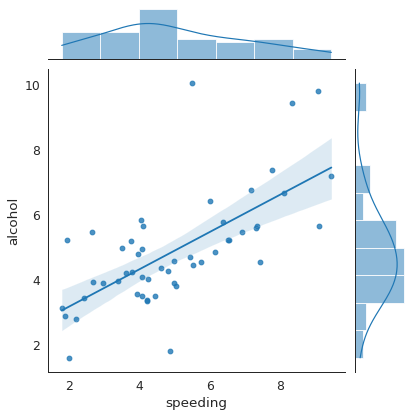

In [54]:
#sns.set_style('darkgrid')
sns.set_style('white')     #background

plt.figure(figsize=(8,4))   #Figure size

sns.set_context('paper',font_scale=1.4) #labels and font
#sns.set_context('talk',font_scale=1.4)
#sns.set_context('poster',font_scale=1.4)

#turn on and off axis
#sns.despine(left=True,bottom=True)

sns.jointplot(x='speeding', y='alcohol',data=crash_df,kind='reg')  #jointplot

**2.Categorical Plots**

**Bar Plots**

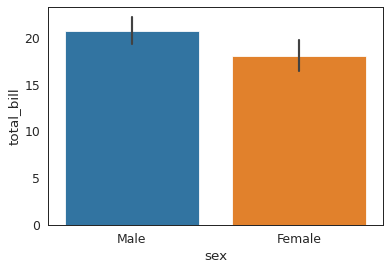

In [55]:
sns.barplot(x='sex', y='total_bill',data=tips_df) 

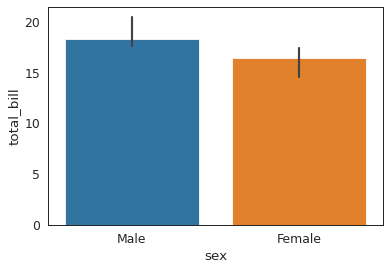

In [56]:
sns.barplot(x='sex', y='total_bill',data=tips_df,estimator=np.median)  #np.cov,np.std,np.var

**Count Plot**

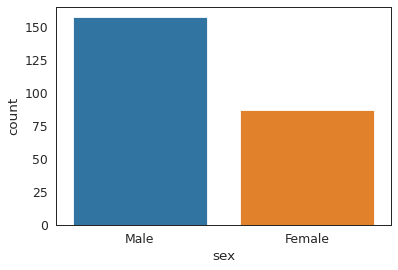

In [57]:
sns.countplot(x='sex',data=tips_df) #total no of males and females
#similar to barplot but counts no of occurences 

**Box Plot**

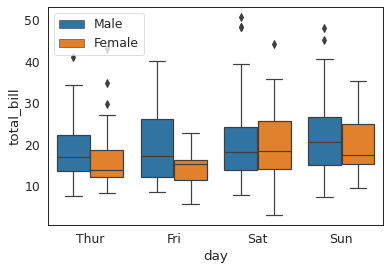

In [59]:
#compare diff variables,shows quantiles of data
sns.boxplot(x='day', y='total_bill',data=tips_df, hue='sex')
plt.legend(loc=0)

**Violin Plot**

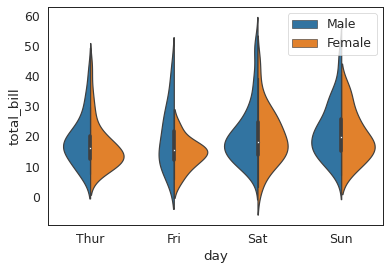

In [61]:
#Its a combination of box and KDE plot
sns.violinplot(x='day', y='total_bill',data=tips_df, hue='sex',split=True)
plt.legend(loc=0)

**Strip Plot**

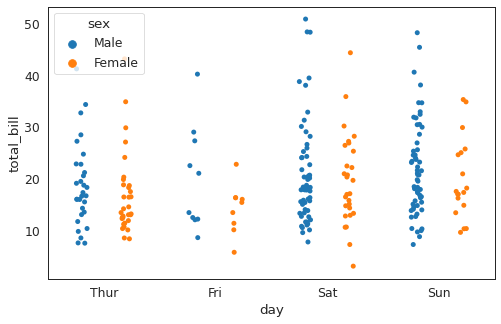

In [70]:
#draws scatter plot where one var is categorical
plt.figure(figsize=(8,5))
sns.stripplot(x='day', y='total_bill',data=tips_df, jitter=True, hue='sex',dodge=True)


**Swarm Plot**

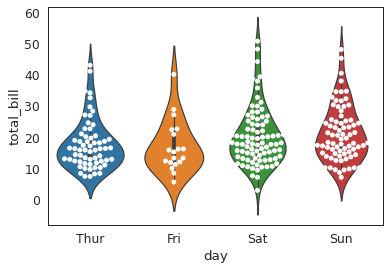

In [73]:
#combine multiple capablities of other plots
#create violoin plot and stack a swarm plot on top of it
sns.violinplot(x='day', y='total_bill',data=tips_df)
sns.swarmplot(x='day', y='total_bill',data=tips_df,color='white')


**Palettes**

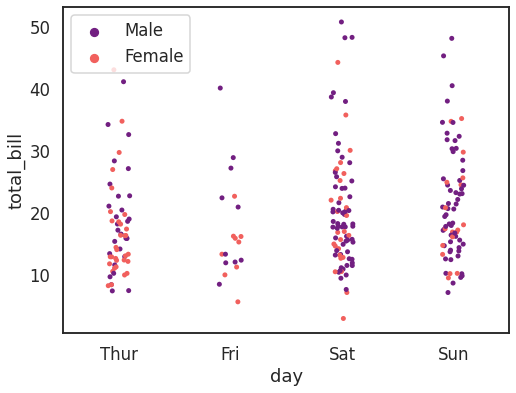

In [80]:
#https://matplotlib.org/stable/tutorials/colors/colormaps.html
plt.figure(figsize=(8,6))
sns.set_style('white')
sns.set_context('talk')
sns.stripplot(x='day', y='total_bill',data=tips_df, hue='sex',palette='magma') #Palette is color
plt.legend(loc=0) #0,1,2,3,4
#https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.legend.html

**Matrix Plot**

**Heatmaps**

In [82]:
plt.figure(figsize=(8,6)) #useful for correlation 
sns.set_style('white')
sns.set_context('paper',font_scale=1.4)
crash_df

crash_mx=crash_df.corr()
crash_mx


,total,speeding,alcohol,not_distracted,no_previous,ins_premium,ins_losses
total,1.000000,0.611548,0.852613,0.827560,0.956179,-0.199702,-0.036011
speeding,0.611548,1.000000,0.669719,0.588010,0.571976,-0.077675,-0.065928
alcohol,0.852613,0.669719,1.000000,0.732816,0.783520,-0.170612,-0.112547
not_distracted,0.827560,0.588010,0.732816,1.000000,0.747307,-0.174856,-0.075970
no_previous,0.956179,0.571976,0.783520,0.747307,1.000000,-0.156895,-0.006359
ins_premium,-0.199702,-0.077675,-0.170612,-0.174856,-0.156895,1.000000,0.623116
ins_losses,-0.036011,-0.065928,-0.112547,-0.075970,-0.006359,0.623116,1.000000


<Figure size 576x432 with 0 Axes>

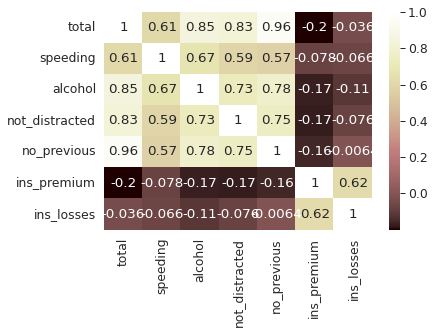

In [85]:
sns.heatmap(crash_mx,annot=True,cmap='pink')     #used for classificaton report

In [89]:
flights=sns.load_dataset('flights')
flights



,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121
...,...,...,...
139,1960,Aug,606
140,1960,Sep,508
141,1960,Oct,461
142,1960,Nov,390


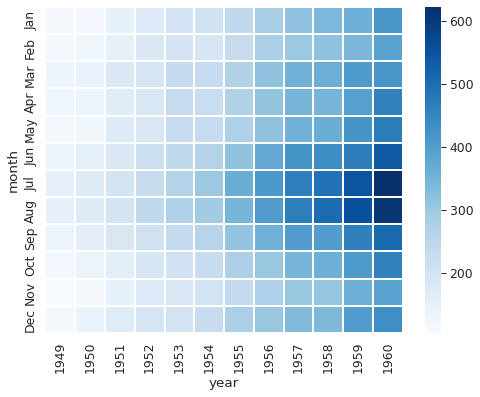

In [99]:
flights=sns.load_dataset('flights')
flights = flights.pivot_table(index='month',columns='year',values='passengers')
#flights 
plt.figure(figsize=(8,6))
sns.set_context('paper', font_scale=1.4)
sns.heatmap(flights,cmap='Blues',linecolor='white',linewidth=1)

**Cluster Map** 

In [104]:
iris=sns.load_dataset('iris')
iris


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


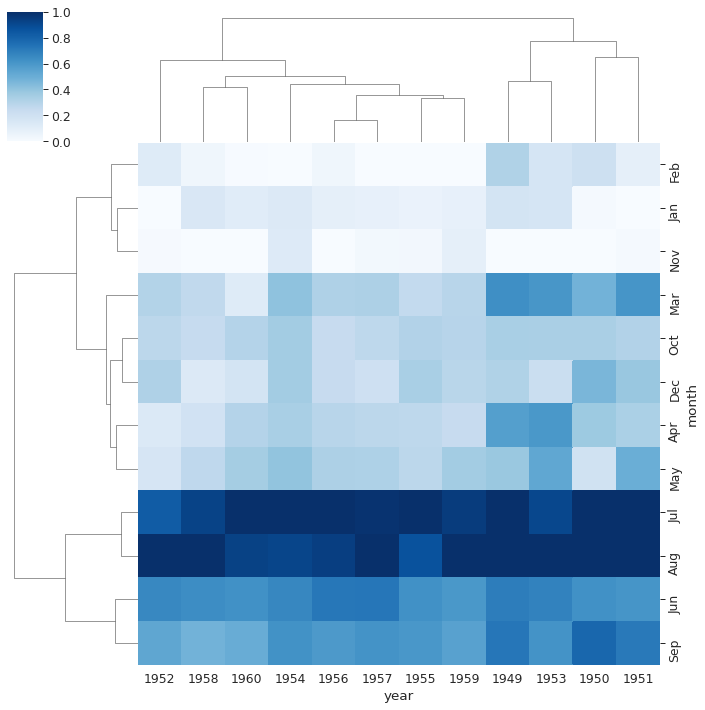

In [107]:
sns.clustermap(flights,cmap="Blues", standard_scale=1)

**PairGrid**

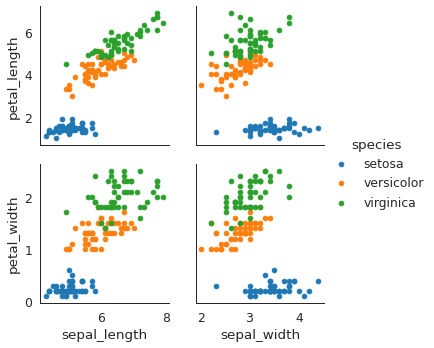

In [116]:
#iris_g=sns.PairGrid(iris,hue='species') #color based on species
#iris_g.map(plt.scatter)
#iris_g.map_diag(plt.hist)
#iris_g.map_offdiag(plt.scatter)
#iris_g.map_upper(plt.scatter)    ##customise and see diff ways 
#iris_g.map_lower(sns.kdeplot)

iris_g = sns.PairGrid(iris, hue="species",
                      x_vars=["sepal_length", "sepal_width"],
                      y_vars=["petal_length", "petal_width"])    #x and y axis
iris_g.map(plt.scatter)
iris_g.add_legend()

**Facet Grid**

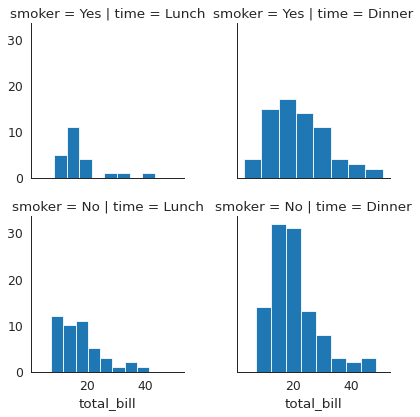

In [118]:
tips_fg=sns.FacetGrid(tips_df,col='time',row='smoker')
tips_fg.map(plt.hist,'total_bill',bins=8)

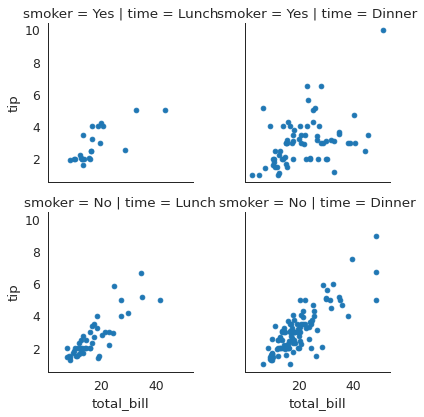

In [120]:
tips_fg=sns.FacetGrid(tips_df,col='time',row='smoker')
tips_fg.map(plt.scatter,'total_bill','tip')

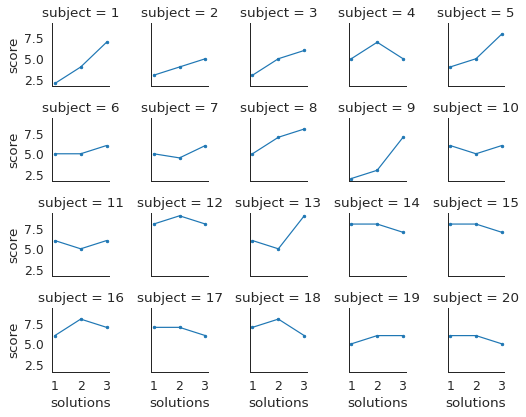

In [123]:
# Can also print multiple plots in a grid in which you define columns & rows
# Get histogram for smokers and non with total bill for lunch & dinner
# tips_fg = sns.FacetGrid(tips_df, col='time', row='smoker')

# You can pass in attributes for the histogram
# tips_fg.map(plt.hist, "total_bill", bins=8)

# Create a scatter plot with data on total bill & tip (You need to parameters)
# tips_fg.map(plt.scatter, "total_bill", "tip")

# We can assign variables to different colors and increase size of grid
# Aspect is 1.3 x the size of height
# You can change the order of the columns
# Define the palette used
# tips_fg = sns.FacetGrid(tips_df, col='time', hue='smoker', height=4, aspect=1.3,
#                       col_order=['Dinner', 'Lunch'], palette='Set1')
# tips_fg.map(plt.scatter, "total_bill", "tip", edgecolor='w')

# # Define size, linewidth and assign a color of white to markers
# kws = dict(s=50, linewidth=.5, edgecolor="w")
# # Define that we want to assign different markers to smokers and non
# tips_fg = sns.FacetGrid(tips_df, col='sex', hue='smoker', height=4, aspect=1.3,
#                         hue_order=['Yes','No'], 
#                         hue_kws=dict(marker=['^', 'v']))
# tips_fg.map(plt.scatter, "total_bill", "tip", **kws)
# tips_fg.add_legend()

# This dataframe provides scores for different students based on the level
# of attention they could provide during testing
att_df = sns.load_dataset("attention")
# Put each person in their own plot with 5 per line and plot their scores
att_fg = sns.FacetGrid(att_df, col='subject', col_wrap=5, height=1.5)
att_fg.map(plt.plot, 'solutions', 'score', marker='.')

**Regression Plot**

In [124]:
tips_df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [125]:
plt.figure(figsize=(8,6))
sns.set_context('paper', font_scale=1.4)

plt.figure(figsize=(8,6))

<Figure size 576x432 with 0 Axes>

<Figure size 576x432 with 0 Axes>

<Figure size 576x432 with 0 Axes>

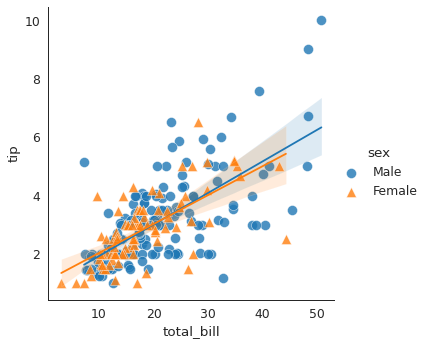

In [126]:
sns.lmplot(x='total_bill', y='tip', hue='sex', data=tips_df, markers=['o', '^'], 
          scatter_kws={'s': 100, 'linewidth': 0.5, 'edgecolor': 'w'})

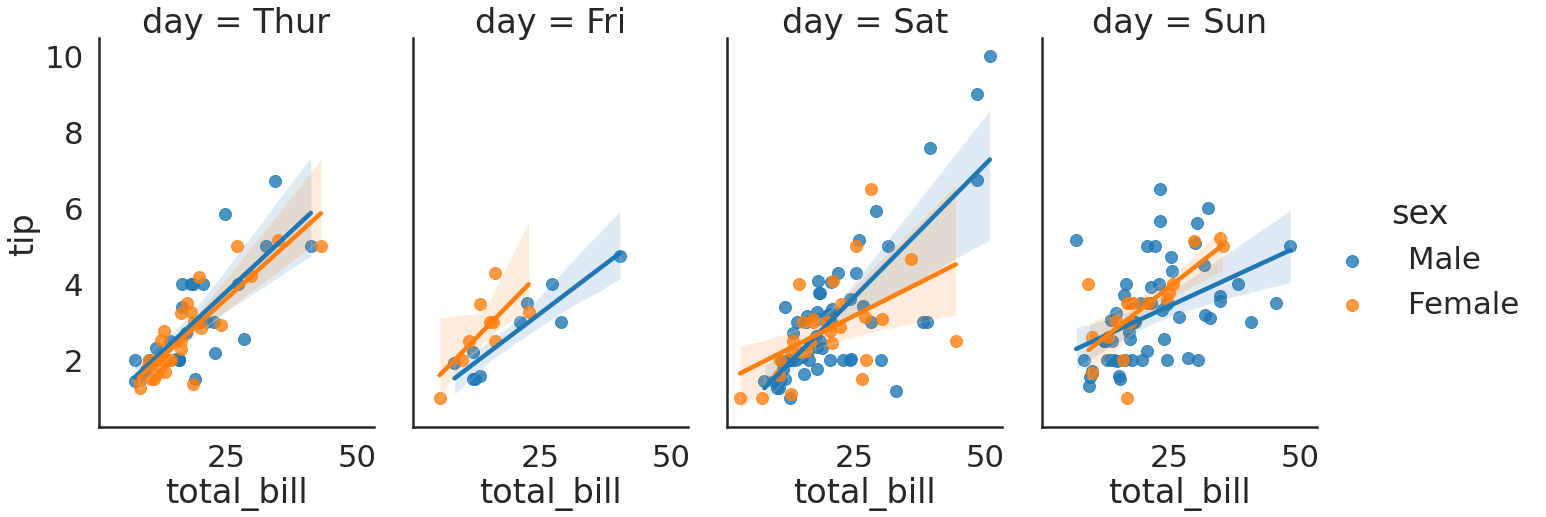

In [127]:
sns.set_context('poster', font_scale=1.4)

sns.lmplot(x='total_bill', y='tip', data=tips_df, col='day', hue='sex',
          height=8, aspect=0.6)